<a href="https://colab.research.google.com/github/WaithiraHawi/Python/blob/main/Customer_Acquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = '/content/customer_acquisition_data.csv'
df = pd.read_csv(file_path)

In [2]:
# Displaying basic info
print("Dataset Information:")
df.info()

# Previewing top rows
print("\nFirst 5 Rows:")
print(df.head())

# Checking missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB

First 5 Rows:
   customer_id           channel       cost  conversion_rate  revenue
0            1          referral   8.320327         0.123145     4199
1            2  paid advertising  30.450327         0.016341     3410
2            3   email marketing   5.246263         0.043822     3164
3            4      social media   9.546326         0.167592     1520
4            5          referral   8.320327         0.123145     2419

Missing Values:
customer_id        0
channel          

In [4]:
# Data types
print("\nData Types:")
print(df.dtypes)

# Shape of dataset
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Data Types:
customer_id          int64
channel             object
cost               float64
conversion_rate    float64
revenue              int64
dtype: object

Dataset contains 800 rows and 5 columns.


In [5]:
# Value counts for categorical columns
print("\nCategorical Value Counts:")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col}:\n{df[col].value_counts()}")


Categorical Value Counts:

channel:
channel
email marketing     214
referral            207
paid advertising    194
social media        185
Name: count, dtype: int64



Correlation Matrix:
                 customer_id      cost  conversion_rate   revenue
customer_id         1.000000 -0.024107         0.006300  0.045997
cost               -0.024107  1.000000        -0.537430  0.018642
conversion_rate     0.006300 -0.537430         1.000000 -0.050456
revenue             0.045997  0.018642        -0.050456  1.000000


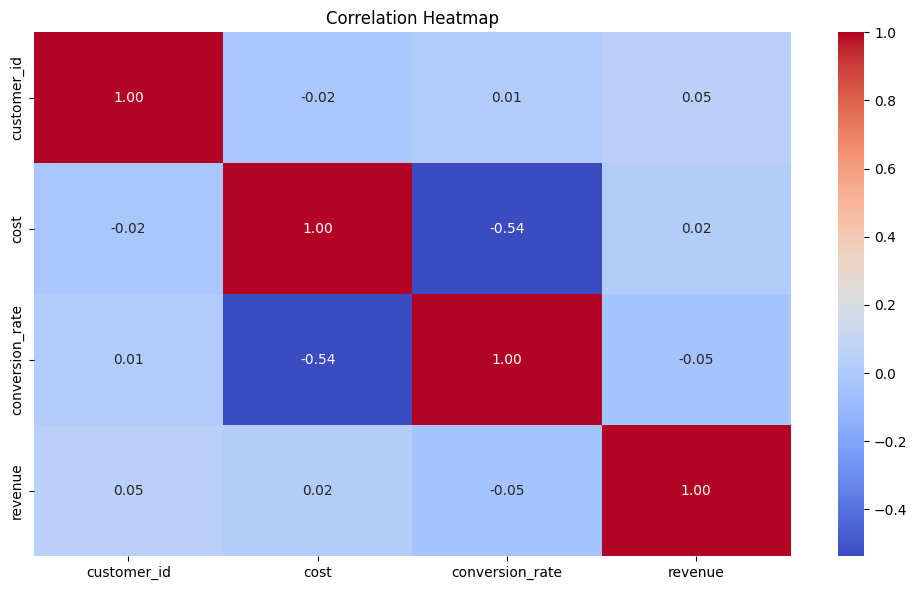

In [6]:
# Correlation matrix for numerical features
print("\nCorrelation Matrix:")
correlation = df.corr(numeric_only=True)
print(correlation)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

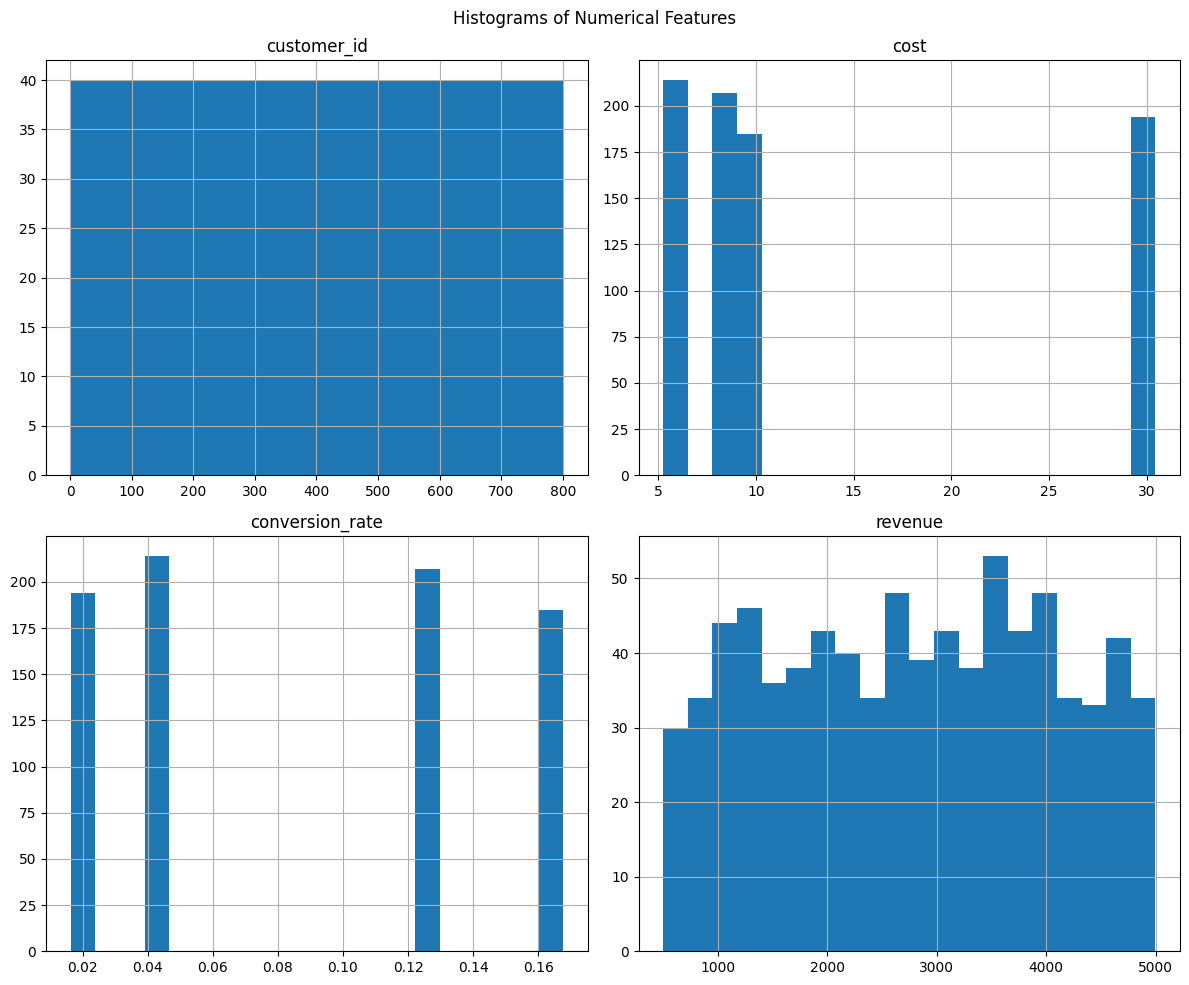

In [7]:
# Histograms for numerical variables
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

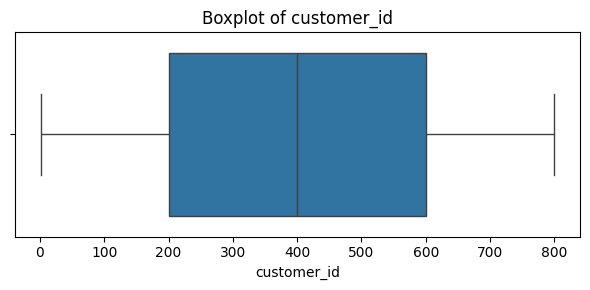

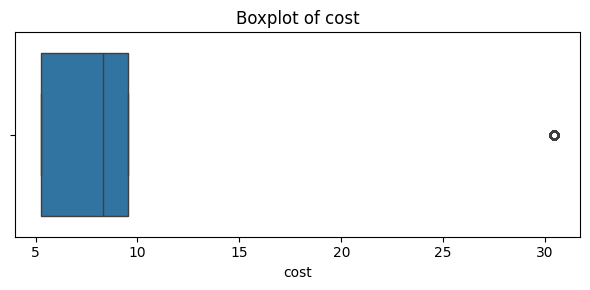

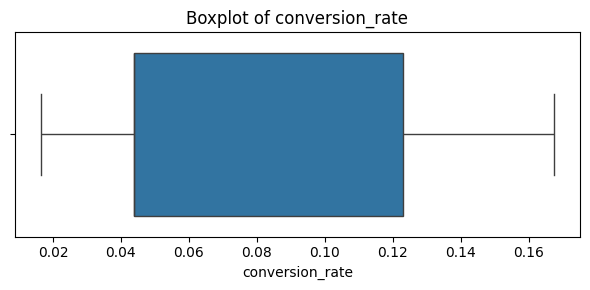

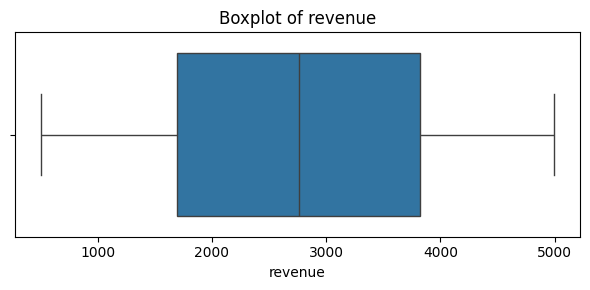

In [9]:
# Boxplot to check outliers
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

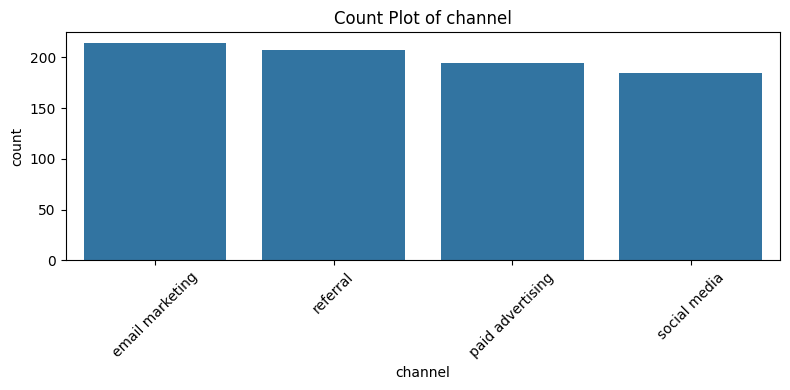

In [10]:
# Count plots for categorical columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
# Saving dataset
df.to_csv('/content/customer_acquisition_data.csv', index=False)
print("\nCleaned data saved as 'customer_acquisition_cleaned.csv'")


Cleaned data saved as 'customer_acquisition_cleaned.csv'


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Dropping duplicates
df = df.drop_duplicates()
# Encoding categorical features
le = LabelEncoder()
df['channel_encoded'] = le.fit_transform(df['channel'])

In [19]:
# Predictive Modeling: Predict Revenue
X = df[['cost', 'conversion_rate', 'channel_encoded']]
y = df['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n--- Predictive Modeling ---")
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


--- Predictive Modeling ---
R-squared: -0.021139505374697
RMSE: 1297.2807966362034


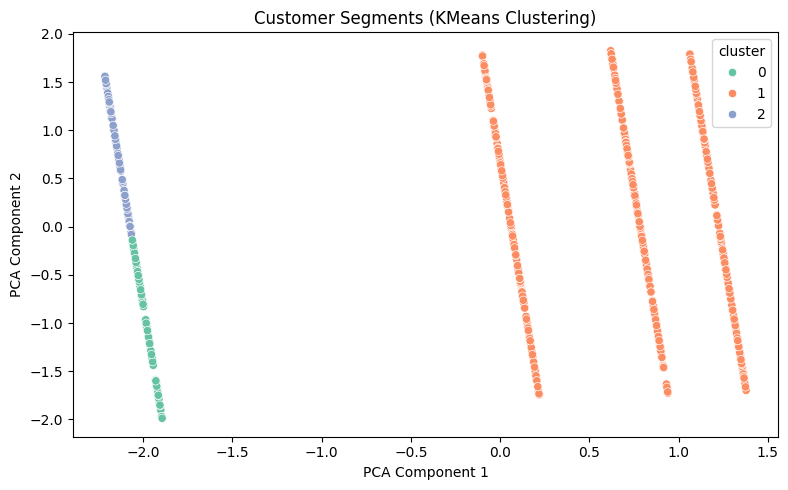

In [20]:

# Customer Segmentation using KMeans
features = df[['cost', 'conversion_rate', 'revenue']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Visualizing clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['cluster'], palette='Set2')
plt.title("Customer Segments (KMeans Clustering)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()


--- Revenue Analysis by Channel ---
                     sum         mean  count
channel                                     
email marketing   604706  2825.728972    214
referral          569552  2751.458937    207
paid advertising  548396  2826.783505    194
social media      492667  2663.064865    185


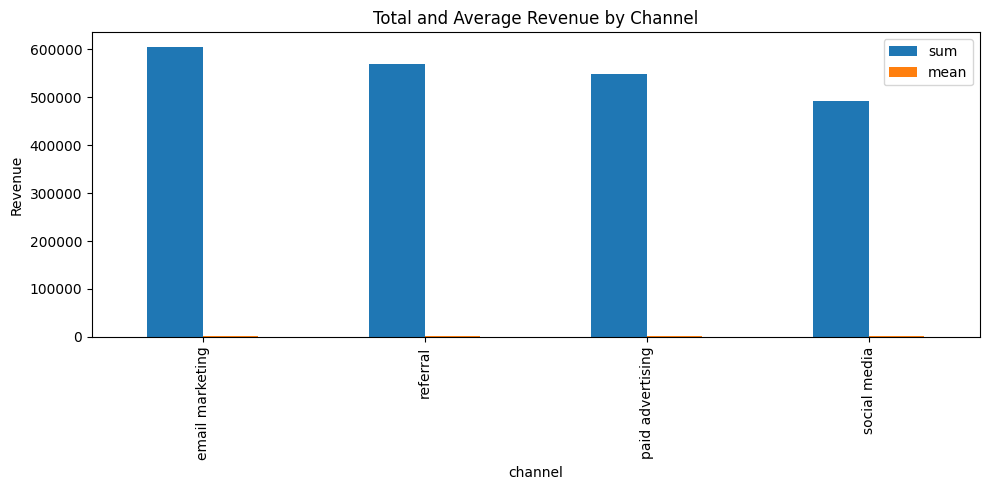

In [21]:
# Revenue Analysis by Channel
channel_revenue = df.groupby('channel')['revenue'].agg(['sum', 'mean', 'count']).sort_values(by='sum', ascending=False)
print("\n--- Revenue Analysis by Channel ---")
print(channel_revenue)

channel_revenue[['sum', 'mean']].plot(kind='bar', figsize=(10, 5))
plt.title("Total and Average Revenue by Channel")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


--- Estimated Lifetime Value (LTV) by Channel ---
                         mean            sum
channel                                     
email marketing   2820.482709  603583.299660
paid advertising  2796.333178  542488.636521
referral          2743.138610  567829.692366
social media      2653.518539  490900.929751


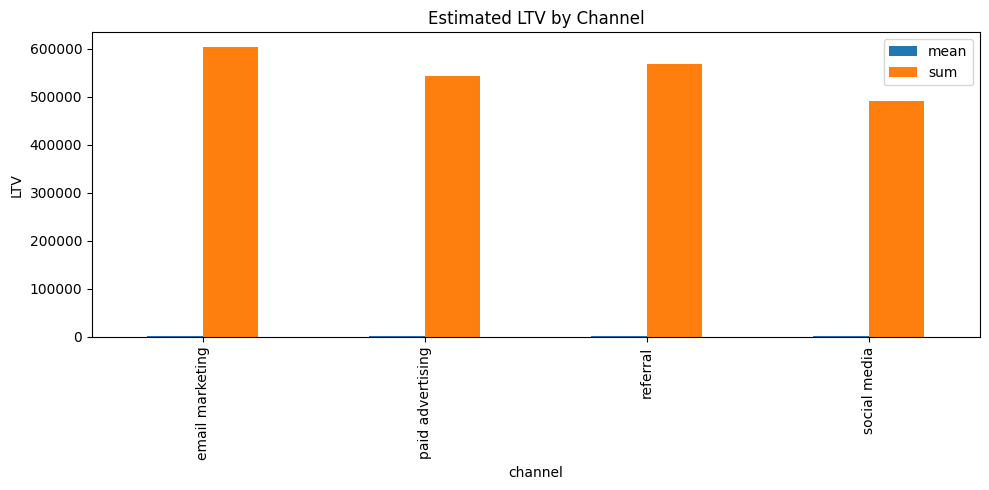

In [22]:
# Lifetime Value (LTV) Estimation
df['ltv'] = df['revenue'] - df['cost']  # Simplified LTV estimate
ltv_summary = df.groupby('channel')['ltv'].agg(['mean', 'sum']).sort_values(by='mean', ascending=False)

print("\n--- Estimated Lifetime Value (LTV) by Channel ---")
print(ltv_summary)

ltv_summary.plot(kind='bar', figsize=(10, 5))
plt.title("Estimated LTV by Channel")
plt.ylabel("LTV")
plt.tight_layout()
plt.show()